## Importing Necessary Libraries

In [206]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruxan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruxan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing the FireFox Dataset

In [208]:
df = pd.read_csv('firefox_bug_reports.csv')
df.head()

,Status,assigned_to_detail,Resolution,BugID,Summary,Closed,Priority,Assignee,Opened,Severity,days_taken
0,RESOLVED,"{'nick': 'nobody', 'email': 'nobody@mozilla.or...",WONTFIX,10954,Dialup properties needs to be exposed in prefs,2008-05-14 18:44:15+00:00,P3,nobody@mozilla.org,1999-07-30 22:55:51+00:00,normal,3210
1,RESOLVED,"{'name': 'nobody@mozilla.org', 'email': 'nobod...",DUPLICATE,14871,[Find] Find whole word only,2017-01-28 19:55:08+00:00,--,nobody@mozilla.org,1999-09-24 21:49:34+00:00,minor,6335
2,RESOLVED,"{'id': 1, 'real_name': 'Nobody; OK to take it ...",WONTFIX,19118,Plug-In Manager (ui for choosing mimetype-plug...,2018-03-05 20:10:55+00:00,--,nobody@mozilla.org,1999-11-17 22:58:26+00:00,normal,6682
3,NEW,{'real_name': 'Nobody; OK to take it and work ...,NaN,21482,Improvement to Save File dialog: folder based ...,2022-10-10 20:49:48+00:00,P3,nobody@mozilla.org,1999-12-11 04:13:35+00:00,S3,8339
4,NEW,"{'name': 'nobody@mozilla.org', 'nick': 'nobody...",NaN,23207,"Options in Save As (location of saved images, ...",2024-04-15 09:21:45+00:00,P5,nobody@mozilla.org,2000-01-06 03:19:51+00:00,S3,8866


## Dropping the Un-Necessary Columns

In [210]:
df = df.drop(['Opened'], axis = 1)
df = df.drop(['Closed'], axis = 1)
df = df.drop(['Priority'], axis = 1)
df.head()

,Status,assigned_to_detail,Resolution,BugID,Summary,Assignee,Severity,days_taken
0,RESOLVED,"{'nick': 'nobody', 'email': 'nobody@mozilla.or...",WONTFIX,10954,Dialup properties needs to be exposed in prefs,nobody@mozilla.org,normal,3210
1,RESOLVED,"{'name': 'nobody@mozilla.org', 'email': 'nobod...",DUPLICATE,14871,[Find] Find whole word only,nobody@mozilla.org,minor,6335
2,RESOLVED,"{'id': 1, 'real_name': 'Nobody; OK to take it ...",WONTFIX,19118,Plug-In Manager (ui for choosing mimetype-plug...,nobody@mozilla.org,normal,6682
3,NEW,{'real_name': 'Nobody; OK to take it and work ...,NaN,21482,Improvement to Save File dialog: folder based ...,nobody@mozilla.org,S3,8339
4,NEW,"{'name': 'nobody@mozilla.org', 'nick': 'nobody...",NaN,23207,"Options in Save As (location of saved images, ...",nobody@mozilla.org,S3,8866


## Getting the information of the Dataset

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Status              10000 non-null  object
 1   assigned_to_detail  10000 non-null  object
 2   Resolution          9745 non-null   object
 3   BugID               10000 non-null  int64 
 4   Summary             10000 non-null  object
 5   Assignee            10000 non-null  object
 6   Severity            9993 non-null   object
 7   days_taken          10000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


## Applying Preprocessing Techniques on Summary Column

In [214]:
df['Summary']

0          Dialup properties needs to be exposed in prefs
1                             [Find] Find whole word only
2       Plug-In Manager (ui for choosing mimetype-plug...
3       Improvement to Save File dialog: folder based ...
4       Options in Save As (location of saved images, ...
                              ...                        
9995    Double-click on a folder in Bookmarks Manager ...
9996    adress bar "pumps" when clicking the home butt...
9997    Focus does not switch to the URL from the loca...
9998                  Cmd+? should bring up Help Contents
9999                add "open in tabs" for live bookmarks
Name: Summary, Length: 10000, dtype: object

### 1. Tokenization

In [216]:
def tokenize(column):

    tokens = nltk.word_tokenize(column)  # Tokenize the text (split into words)
    return [w for w in tokens if w.isalpha()]    # Keep only alphabetical tokens

In [217]:
# Apply the tokenize function to the Summary column and store results
df['Tokenized'] = df.apply(lambda x: tokenize(x['Summary']), axis=1)
df

,Status,assigned_to_detail,Resolution,BugID,Summary,Assignee,Severity,days_taken,Tokenized
0,RESOLVED,"{'nick': 'nobody', 'email': 'nobody@mozilla.or...",WONTFIX,10954,Dialup properties needs to be exposed in prefs,nobody@mozilla.org,normal,3210,"[Dialup, properties, needs, to, be, exposed, i..."
1,RESOLVED,"{'name': 'nobody@mozilla.org', 'email': 'nobod...",DUPLICATE,14871,[Find] Find whole word only,nobody@mozilla.org,minor,6335,"[Find, Find, whole, word, only]"
2,RESOLVED,"{'id': 1, 'real_name': 'Nobody; OK to take it ...",WONTFIX,19118,Plug-In Manager (ui for choosing mimetype-plug...,nobody@mozilla.org,normal,6682,"[Manager, ui, for, choosing, associations]"
3,NEW,{'real_name': 'Nobody; OK to take it and work ...,NaN,21482,Improvement to Save File dialog: folder based ...,nobody@mozilla.org,S3,8339,"[Improvement, to, Save, File, dialog, folder, ..."
4,NEW,"{'name': 'nobody@mozilla.org', 'nick': 'nobody...",NaN,23207,"Options in Save As (location of saved images, ...",nobody@mozilla.org,S3,8866,"[Options, in, Save, As, location, of, saved, i..."
...,...,...,...,...,...,...,...,...,...
9995,RESOLVED,"{'nick': 'vlad', 'email': 'vladimir@pobox.com'...",WORKSFORME,253675,Double-click on a folder in Bookmarks Manager ...,vladimir@pobox.com,normal,758,"[on, a, folder, in, Bookmarks, Manager, opens,..."
9996,RESOLVED,"{'name': 'nobody@mozilla.org', 'nick': 'nobody...",WORKSFORME,253686,"adress bar ""pumps"" when clicking the home butt...",nobody@mozilla.org,minor,1166,"[adress, bar, pumps, when, clicking, the, home..."
9997,RESOLVED,"{'nick': 'bugs', 'email': 'bugs@bengoodger.com...",DUPLICATE,253692,Focus does not switch to the URL from the loca...,bugs@bengoodger.com,minor,499,"[Focus, does, not, switch, to, the, URL, from,..."
9998,RESOLVED,"{'nick': 'asaf', 'email': 'asaf@sent.com', 'na...",FIXED,253693,Cmd+? should bring up Help Contents,asaf@sent.com,normal,303,"[should, bring, up, Help, Contents]"


### 2. Converting the Summary into Lowercase

In [219]:
# Convert the list of tokens back into a single string for each bug report
df['String_Tokenized'] = [' '.join(map(str, l)) for l in df['Tokenized']]
# Convert text to lowercase for uniformity
df['String_Tokenized'] = df['String_Tokenized'].apply(str.lower)

df['String_Tokenized']

0          dialup properties needs to be exposed in prefs
1                               find find whole word only
2                    manager ui for choosing associations
3       improvement to save file dialog folder based o...
4       options in save as location of saved images ch...
                              ...                        
9995    on a folder in bookmarks manager opens all ite...
9996    adress bar pumps when clicking the home button...
9997    focus does not switch to the url from the loca...
9998                        should bring up help contents
9999                  add open in tabs for live bookmarks
Name: String_Tokenized, Length: 10000, dtype: object

### 3. Removing the Stopwords from the Summary

In [221]:
stop_words = stopwords.words('english')
df['String_Tokenized'] = df['String_Tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['String_Tokenized']

0                   dialup properties needs exposed prefs
1                                    find find whole word
2                        manager ui choosing associations
3           improvement save file dialog folder based url
4       options save location saved images choice file...
                              ...                        
9995            folder bookmarks manager opens items tabs
9996    adress bar pumps clicking home button blank de...
9997    focus switch url location bar autocomplete lis...
9998                                  bring help contents
9999                         add open tabs live bookmarks
Name: String_Tokenized, Length: 10000, dtype: object

### 4. Removing the Punctuations

In [223]:
df["Summary_wo_Punctuation"] = df['String_Tokenized'].str.replace('[^\w\s]','')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\1190965271.py:1: SyntaxWarning: invalid escape sequence '\w'
  df["Summary_wo_Punctuation"] = df['String_Tokenized'].str.replace('[^\w\s]','')


,Status,assigned_to_detail,Resolution,BugID,Summary,Assignee,Severity,days_taken,Tokenized,String_Tokenized,Summary_wo_Punctuation
0,RESOLVED,"{'nick': 'nobody', 'email': 'nobody@mozilla.or...",WONTFIX,10954,Dialup properties needs to be exposed in prefs,nobody@mozilla.org,normal,3210,"[Dialup, properties, needs, to, be, exposed, i...",dialup properties needs exposed prefs,dialup properties needs exposed prefs
1,RESOLVED,"{'name': 'nobody@mozilla.org', 'email': 'nobod...",DUPLICATE,14871,[Find] Find whole word only,nobody@mozilla.org,minor,6335,"[Find, Find, whole, word, only]",find find whole word,find find whole word
2,RESOLVED,"{'id': 1, 'real_name': 'Nobody; OK to take it ...",WONTFIX,19118,Plug-In Manager (ui for choosing mimetype-plug...,nobody@mozilla.org,normal,6682,"[Manager, ui, for, choosing, associations]",manager ui choosing associations,manager ui choosing associations
3,NEW,{'real_name': 'Nobody; OK to take it and work ...,NaN,21482,Improvement to Save File dialog: folder based ...,nobody@mozilla.org,S3,8339,"[Improvement, to, Save, File, dialog, folder, ...",improvement save file dialog folder based url,improvement save file dialog folder based url
4,NEW,"{'name': 'nobody@mozilla.org', 'nick': 'nobody...",NaN,23207,"Options in Save As (location of saved images, ...",nobody@mozilla.org,S3,8866,"[Options, in, Save, As, location, of, saved, i...",options save location saved images choice file...,options save location saved images choice file...


### 5. Removing ' " ' with blank space ' '

In [225]:
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].apply(lambda x: x.replace('"', ''))
df['Summary_wo_Punctuation']

0                   dialup properties needs exposed prefs
1                                    find find whole word
2                        manager ui choosing associations
3           improvement save file dialog folder based url
4       options save location saved images choice file...
                              ...                        
9995            folder bookmarks manager opens items tabs
9996    adress bar pumps clicking home button blank de...
9997    focus switch url location bar autocomplete lis...
9998                                  bring help contents
9999                         add open tabs live bookmarks
Name: Summary_wo_Punctuation, Length: 10000, dtype: object

### 6. Stemming the Summary Column

In [227]:
# Use English stemmer.
stemmer = SnowballStemmer("english")
# Split text into words, apply stemming, and rejoin the words into a single string
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].str.split()
df['Stemmed'] = df['Summary_wo_Punctuation'].apply(lambda x: [stemmer.stem(y) for y in x]) 

### 7. Converting the Stemmed column into string type

In [229]:
df['ListString'] = [' '.join(map(str, l)) for l in df['Stemmed']]
df

,Status,assigned_to_detail,Resolution,BugID,Summary,Assignee,Severity,days_taken,Tokenized,String_Tokenized,Summary_wo_Punctuation,Stemmed,ListString
0,RESOLVED,"{'nick': 'nobody', 'email': 'nobody@mozilla.or...",WONTFIX,10954,Dialup properties needs to be exposed in prefs,nobody@mozilla.org,normal,3210,"[Dialup, properties, needs, to, be, exposed, i...",dialup properties needs exposed prefs,"[dialup, properties, needs, exposed, prefs]","[dialup, properti, need, expos, pref]",dialup properti need expos pref
1,RESOLVED,"{'name': 'nobody@mozilla.org', 'email': 'nobod...",DUPLICATE,14871,[Find] Find whole word only,nobody@mozilla.org,minor,6335,"[Find, Find, whole, word, only]",find find whole word,"[find, find, whole, word]","[find, find, whole, word]",find find whole word
2,RESOLVED,"{'id': 1, 'real_name': 'Nobody; OK to take it ...",WONTFIX,19118,Plug-In Manager (ui for choosing mimetype-plug...,nobody@mozilla.org,normal,6682,"[Manager, ui, for, choosing, associations]",manager ui choosing associations,"[manager, ui, choosing, associations]","[manag, ui, choos, associ]",manag ui choos associ
3,NEW,{'real_name': 'Nobody; OK to take it and work ...,NaN,21482,Improvement to Save File dialog: folder based ...,nobody@mozilla.org,S3,8339,"[Improvement, to, Save, File, dialog, folder, ...",improvement save file dialog folder based url,"[improvement, save, file, dialog, folder, base...","[improv, save, file, dialog, folder, base, url]",improv save file dialog folder base url
4,NEW,"{'name': 'nobody@mozilla.org', 'nick': 'nobody...",NaN,23207,"Options in Save As (location of saved images, ...",nobody@mozilla.org,S3,8866,"[Options, in, Save, As, location, of, saved, i...",options save location saved images choice file...,"[options, save, location, saved, images, choic...","[option, save, locat, save, imag, choic, filenam]",option save locat save imag choic filenam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,RESOLVED,"{'nick': 'vlad', 'email': 'vladimir@pobox.com'...",WORKSFORME,253675,Double-click on a folder in Bookmarks Manager ...,vladimir@pobox.com,normal,758,"[on, a, folder, in, Bookmarks, Manager, opens,...",folder bookmarks manager opens items tabs,"[folder, bookmarks, manager, opens, items, tabs]","[folder, bookmark, manag, open, item, tab]",folder bookmark manag open item tab
9996,RESOLVED,"{'name': 'nobody@mozilla.org', 'nick': 'nobody...",WORKSFORME,253686,"adress bar ""pumps"" when clicking the home butt...",nobody@mozilla.org,minor,1166,"[adress, bar, pumps, when, clicking, the, home...",adress bar pumps clicking home button blank de...,"[adress, bar, pumps, clicking, home, button, b...","[adress, bar, pump, click, home, button, blank...",adress bar pump click home button blank defaul...
9997,RESOLVED,"{'nick': 'bugs', 'email': 'bugs@bengoodger.com...",DUPLICATE,253692,Focus does not switch to the URL from the loca...,bugs@bengoodger.com,minor,499,"[Focus, does, not, switch, to, the, URL, from,...",focus switch url location bar autocomplete lis...,"[focus, switch, url, location, bar, autocomple...","[focus, switch, url, locat, bar, autocomplet, ...",focus switch url locat bar autocomplet list mo...
9998,RESOLVED,"{'nick': 'asaf', 'email': 'asaf@sent.com', 'na...",FIXED,253693,Cmd+? should bring up Help Contents,asaf@sent.com,normal,303,"[should, bring, up, Help, Contents]",bring help contents,"[bring, help, contents]","[bring, help, content]",bring help content


### 8. Applying TF-IDF using SkLearn

In [241]:
# Convert the processed text data into a list
data = []
for i in df['ListString']:
    review = ''.join(i) 
    data.append(review)
print(data)

['dialup properti need expos pref', 'find find whole word', 'manag ui choos associ', 'improv save file dialog folder base url', 'option save locat save imag choic filenam', 'download window resiz', 'default directori smart', 'implement hidden pref enabl transpar browser ala aterm eterm', 'add support font pref front end', 'uriload need use webprogress cancel load', 'save convert line break depend platform', 'customiz chrome page display sidebar panel', 'unknown file type prompt go away select save file', 'acceler download file mirror swarm', 'execut download link like wget recurs', 'mac html file save without extens view plain text', 'current url querri anoth app', 'ask confirm window close form edit prompt user quit', 'easi hit instead', 'assert compon scope save', 'languag encod font pref dialog sort local', 'must defin list default mime type associ helper app prefer', 'forc javascript link open new window new tab', 'synapt touchpad scroll work', 'add view option unknown mime', 'supp

In [242]:
tfidf = TfidfVectorizer()
 
# Compute TF-IDF matrix
result = tfidf.fit_transform(data)

In [243]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
aaaa : 9.517293186416572
aahig : 9.517293186416572
abbr : 9.517293186416572
abil : 6.167389099141966
abl : 6.914603500972187
ablil : 9.517293186416572
abnorm : 8.824146005856626
abod : 9.517293186416572
abort : 9.517293186416572
absolut : 8.130998825296679
absorb : 9.517293186416572
abstract : 9.111828078308406
accel : 9.111828078308406
acceler : 7.90785527398247
accent : 8.601002454542416
accept : 6.426250733058255
acces : 9.111828078308406
access : 5.528309139852296
accessdirect : 9.517293186416572
accesskey : 7.437851644736734
accident : 8.601002454542416
accidentali : 9.517293186416572
accidenti : 9.517293186416572
accommod : 9.517293186416572
accord : 8.824146005856626
account : 7.645491009514979
acctual : 9.517293186416572
accur : 9.517293186416572
acess : 9.517293186416572
acknowledg : 9.517293186416572
acrobat : 7.1659179292530935
acronym : 8.601002454542416
across : 7.90785527398247
acroynm : 9.517293186416572
act : 8.130998825296679
action : 6.74470446417679
acti

In [244]:
# Display the vocabulary (word indices) created by TF-IDF
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'dialup': 812, 'properti': 2476, 'need': 2028, 'expos': 1071, 'pref': 2416, 'find': 1141, 'whole': 3607, 'word': 3649, 'manag': 1813, 'ui': 3354, 'choos': 496, 'associ': 196, 'improv': 1486, 'save': 2756, 'file': 1130, 'dialog': 808, 'folder': 1179, 'base': 278, 'url': 3485, 'option': 2220, 'locat': 1747, 'imag': 1471, 'choic': 492, 'filenam': 1131, 'download': 898, 'window': 3622, 'resiz': 2675, 'default': 752, 'directori': 827, 'smart': 2943, 'implement': 1481, 'hidden': 1376, 'enabl': 969, 'transpar': 3300, 'browser': 388, 'ala': 81, 'aterm': 204, 'eterm': 1018, 'add': 44, 'support': 3111, 'font': 1182, 'front': 1232, 'end': 975, 'uriload': 3484, 'use': 3491, 'webprogress': 3580, 'cancel': 426, 'load': 1741, 'convert': 632, 'line': 1720, 'break': 377, 'depend': 773, 'platform': 2363, 'customiz': 705, 'chrome': 503, 'page': 2262, 'display': 846, 'sidebar': 2894, 'panel': 2271, 'unknown': 3424, 'type': 3342, 'prompt': 2472, 'go': 1294, 'away': 253, 'select': 2814, 'acc

In [245]:
# display tf-idf values
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 2416)	0.38085402862159445
  (0, 1071)	0.5126778512495337
  (0, 2028)	0.33949661200398756
  (0, 2476)	0.3762199353545107
  (0, 812)	0.5790615169397156
  (1, 3649)	0.4501485988276597
  (1, 3607)	0.5074595912429719
  (1, 1141)	0.7347455356985918
  (2, 196)	0.5609170815970375
  (2, 496)	0.5336419835797369
  (2, 3354)	0.4922488342417472
  (2, 1813)	0.3978559363907833
  (3, 3485)	0.2838825492681837
  (3, 278)	0.5080635282659834
  (3, 1179)	0.31835493670775805
  (3, 808)	0.2975980923479399
  (3, 1130)	0.2950938609549002
  (3, 2756)	0.3337696529839075
  (3, 1486)	0.5223840456458408
  (4, 1131)	0.4533000868121269
  (4, 492)	0.4501000798815248
  (4, 1471)	0.28936625332209936
  (4, 1747)	0.30676266755319515
  (4, 2220)	0.27118202690041826
  (4, 2756)	0.5835692717295201
  :	:
  (9996, 62)	0.4517995284476557
  (9996, 526)	0.2317771608828129
  (9996, 1399)	0.32591426346686714
  (9996, 277)	0.22180210350321855
  (9996, 415)	0.22993381738723945
  (9996, 323)	0.32897476625221517
  

In [246]:
print('\ntf-idf values in matrix form:')
ab = result.toarray() # Convert the TF-IDF matrix to an array for further processing
print(ab)


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [247]:
# Get the set of feature names (words)
words_set = tfidf.get_feature_names_out() 
print(words_set)

['aaaa' 'aahig' 'abbr' ... 'zone' 'zoom' 'zoon']


In [248]:
# Create a new DataFrame with the TF-IDF values and feature names
df_tf_idf = pd.DataFrame(ab, columns = words_set)
df_tf_idf

,aaaa,aahig,abbr,abil,abl,ablil,abnorm,abod,abort,absolut,...,yesterday,yet,yield,zero,zip,zipper,zombi,zone,zoom,zoon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
# Add the Severity column to the TF-IDF DataFrame for labels
df_tf_idf['Severity'] = df['Severity']

In [250]:
# Take a subset of the data for processing (first 1000 rows)
df2 = df_tf_idf.iloc[0:1000,:]

In [251]:
# Drop rows with missing values
df2 = df2.dropna()
df2

,aaaa,aahig,abbr,abil,abl,ablil,abnorm,abod,abort,absolut,...,yet,yield,zero,zip,zipper,zombi,zone,zoom,zoon,Severity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,minor
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,S3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,S3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,trivial
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal


## GA with KNN

Generation: 1
Best (GA): 0.3028549073818579
Generation: 2
Best (GA): 0.2996916803211278


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 3
Best (GA): 0.28314455872347044


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 4
Best (GA): 0.2731603868129814


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 5
Best (GA): 0.25999955059371066


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 6
Best (GA): 0.2598893651596876


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 7
Best (GA): 0.2565675785719487


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 8
Best (GA): 0.2565675785719487


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 9
Best (GA): 0.2565675785719487


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 10
Best (GA): 0.2532350421857684


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 11
Best (GA): 0.24998581673750803


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 12
Best (GA): 0.24998581673750803


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 13
Best (GA): 0.24998581673750803


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 14
Best (GA): 0.2465995313591214


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 15
Best (GA): 0.2465995313591214


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 16
Best (GA): 0.24658609411106983


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 17
Best (GA): 0.24658609411106983


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 18
Best (GA): 0.24658609411106983


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 19
Best (GA): 0.24327505732177218


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 20
Best (GA): 0.24326699497294121


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 21
Best (GA): 0.23992639623793002


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 22
Best (GA): 0.23992639623793002


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 23
Best (GA): 0.23992639623793002


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 24
Best (GA): 0.23992639623793002


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 25
Best (GA): 0.23992639623793002


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 26
Best (GA): 0.23992639623793002


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 27
Best (GA): 0.2398968342922165


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 28
Best (GA): 0.2398968342922165


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 29
Best (GA): 0.2398968342922165


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


Generation: 30
Best (GA): 0.23659923475097047
Accuracy: 76.58862876254182
Feature Size: 1796


C:\Users\ruxan\AppData\Local\Temp\ipykernel_8556\3221639612.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit[i, 0] = FF[ind[i, 0]]


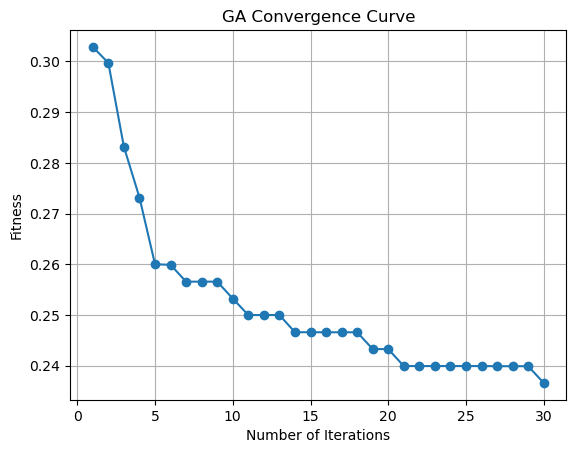

In [253]:
import numpy as np  # Library for numerical computations
from numpy.random import rand  # Random number generation
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.model_selection import train_test_split  # Train-test split utility
import matplotlib.pyplot as plt  # Plotting library

# Define the error rate function to calculate the model's performance
def error_rate(xtrain, ytrain, x, opts):
    # Parameters extracted from the options dictionary
    k = opts['k']  # Number of neighbors for KNN
    fold = opts['fold']  # Train-test split dictionary
    xt = fold['xt']  # Training features
    yt = fold['yt']  # Training labels
    xv = fold['xv']  # Validation features
    yv = fold['yv']  # Validation labels
    
    # Determine number of instances for train and validation sets
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Select features indicated by binary mask `x` (1 = selected, 0 = not selected)
    xtrain = xt[:, x == 1]
    ytrain = yt.reshape(num_train)  # Reshape for consistency
    xvalid = xv[:, x == 1]
    yvalid = yv.reshape(num_valid)  # Reshape for consistency
    
    # Train the KNN model
    mdl = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN
    mdl.fit(xtrain, ytrain)  # Fit the model on training data
    
    # Predict validation set labels
    ypred = mdl.predict(xvalid)
    acc = np.sum(yvalid == ypred) / num_valid  # Calculate accuracy
    error = 1 - acc  # Convert accuracy to error rate
    
    return error

# Define the objective function to optimize (error rate + feature size penalty)
def Fun(xtrain, ytrain, x, opts):
    # Weight parameters
    alpha = 0.99  # Importance of error rate
    beta = 1 - alpha  # Importance of feature subset size
    
    max_feat = len(x)  # Total number of features
    num_feat = np.sum(x == 1)  # Number of selected features
    
    # Handle case where no features are selected
    if num_feat == 0:
        cost = 1  # Max cost when no features are selected
    else:
        # Calculate error rate and combine with feature penalty
        error = error_rate(xtrain, ytrain, x, opts)
        cost = alpha * error + beta * (num_feat / max_feat)
    
    return cost

# Initialize positions for Genetic Algorithm's population
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')  # Initialize matrix
    for i in range(N):
        for d in range(dim):
            X[i, d] = lb[0, d] + (ub[0, d] - lb[0, d]) * rand()  # Randomly assign values within bounds
    return X

# Binary conversion of continuous positions for feature selection
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')  # Initialize binary matrix
    for i in range(N):
        for d in range(dim):
            if X[i, d] > thres:  # Convert to binary based on threshold
                Xbin[i, d] = 1
            else:
                Xbin[i, d] = 0
    return Xbin

# Roulette wheel selection for parent chromosomes
def roulette_wheel(prob):
    num = len(prob)  # Number of probabilities
    C = np.cumsum(prob)  # Cumulative sum of probabilities
    P = rand()  # Generate random value between 0 and 1
    for i in range(num):
        if C[i] > P:  # Select index based on probability
            index = i
            break
    return index

# Genetic Algorithm for Feature Selection
def gafs(xtrain, ytrain, opts):
    # Genetic Algorithm parameters
    ub = 1  # Upper bound for chromosome values
    lb = 0  # Lower bound for chromosome values
    thres = 0.5  # Threshold for binary conversion
    CR = 0.8  # Crossover rate
    MR = 0.01  # Mutation rate
    
    N = opts['N']  # Population size (number of chromosomes)
    max_iter = opts['T']  # Maximum number of iterations
    if 'CR' in opts: CR = opts['CR']  # Override default crossover rate if provided
    if 'MR' in opts: MR = opts['MR']  # Override default mutation rate if provided
    
    # Number of features (dimension of chromosomes)
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:  # Uniform bounds
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
    
    # Initialize population positions
    X = init_position(lb, ub, N, dim)
    X = binary_conversion(X, thres, N, dim)  # Convert to binary format
    
    # Fitness evaluation for initial population
    fit = np.zeros([N, 1], dtype='float')  # Fitness values
    Xgb = np.zeros([1, dim], dtype='int')  # Global best chromosome
    fitG = float('inf')  # Global best fitness (initially infinite)
    
    for i in range(N):
        fit[i, 0] = Fun(xtrain, ytrain, X[i, :], opts)  # Calculate fitness
        if fit[i, 0] < fitG:
            Xgb[0, :] = X[i, :]  # Update global best chromosome
            fitG = fit[i, 0]  # Update global best fitness
    
    # Initialize convergence curve and start iterations
    curve = np.zeros([1, max_iter], dtype='float')  # Convergence history
    t = 0
    curve[0, t] = fitG.copy()  # Save initial best fitness
    print("Generation:", t + 1)
    print("Best (GA):", curve[0, t])
    t += 1
    
    while t < max_iter:  # Main genetic algorithm loop
        # Calculate probabilities based on fitness
        inv_fit = 1 / (1 + fit)  # Inverse fitness values
        prob = inv_fit / np.sum(inv_fit)  # Normalize probabilities
        
        # Perform crossover to generate offspring
        Nc = 0  # Number of crossovers
        for i in range(N):
            if rand() < CR:
                Nc += 1
        x1 = np.zeros([Nc, dim], dtype='int')  # Offspring 1
        x2 = np.zeros([Nc, dim], dtype='int')  # Offspring 2
        for i in range(Nc):
            k1 = roulette_wheel(prob)  # Select parent 1
            k2 = roulette_wheel(prob)  # Select parent 2
            P1 = X[k1, :].copy()  # Parent 1 chromosome
            P2 = X[k2, :].copy()  # Parent 2 chromosome
            index = np.random.randint(low=1, high=dim-1)  # Random crossover point
            x1[i, :] = np.concatenate((P1[0:index], P2[index:]))  # Create offspring 1
            x2[i, :] = np.concatenate((P2[0:index], P1[index:]))  # Create offspring 2
            # Apply mutation
            for d in range(dim):
                if rand() < MR:
                    x1[i, d] = 1 - x1[i, d]  # Flip bit
                if rand() < MR:
                    x2[i, d] = 1 - x2[i, d]  # Flip bit
        
        # Combine offspring and evaluate
        Xnew = np.concatenate((x1, x2), axis=0)
        Fnew = np.zeros([2 * Nc, 1], dtype='float')  # Fitness of new offspring
        for i in range(2 * Nc):
            Fnew[i, 0] = Fun(xtrain, ytrain, Xnew[i, :], opts)  # Calculate fitness
            if Fnew[i, 0] < fitG:  # Update global best if improved
                Xgb[0, :] = Xnew[i, :]
                fitG = Fnew[i, 0]
        
        # Update convergence curve
        curve[0, t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (GA):", curve[0, t])
        t += 1
        
        # Elitism: Retain best chromosomes for next generation
        XX = np.concatenate((X, Xnew), axis=0)
        FF = np.concatenate((fit, Fnew), axis=0)
        ind = np.argsort(FF, axis=0)  # Sort based on fitness
        for i in range(N):
            X[i, :] = XX[ind[i, 0], :]
            fit[i, 0] = FF[ind[i, 0]]
    
    # Extract final best feature subset
    Gbin = Xgb[0, :]  # Binary representation of best subset
    pos = np.asarray(range(0, dim))  # Indices of features
    sel_index = pos[Gbin == 1]  # Indices of selected features
    num_feat = len(sel_index)  # Number of selected features
    
    # Return results as a dictionary
    ga_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    return ga_data


# Load the preprocessed and TF-IDF-transformed dataset
data = df2.values  # Convert DataFrame to NumPy array
feat = np.asarray(data[:, 0:-1])  # Extract features (all columns except the last)
label = np.asarray(data[:, -1])  # Extract labels (the last column, Severity)

# Split the dataset into training and testing sets (70% training, 30% testing)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state=42)
# Store the splits into a dictionary for easy access
fold = {'xt': xtrain, 'yt': ytrain, 'xv': xtest, 'yv': ytest}

# Set parameters for the Genetic Algorithm
k = 5  # Number of neighbors for KNN
N = 10  # Population size (number of chromosomes)
T = 30  # Number of generations (iterations)
CR = 0.8  # Crossover rate
MR = 0.01  # Mutation rate
opts = {'k': k, 'fold': fold, 'N': N, 'T': T, 'CR': CR, 'MR': MR}  # Store parameters in a dictionary

# Perform feature selection using the Genetic Algorithm
fmdl = gafs(xtrain, ytrain, opts)  # Call the GA function
sf = fmdl['sf']  # Extract the indices of the selected features

# Train a KNN model using only the selected features
num_train = np.size(xtrain, 0)  # Number of training samples
num_valid = np.size(xtest, 0)  # Number of testing samples
x_train = xtrain[:, sf]  # Select the relevant features for training
y_train = ytrain.reshape(num_train)  # Reshape training labels for consistency
x_valid = xtest[:, sf]  # Select the relevant features for testing
y_valid = ytest.reshape(num_valid)  # Reshape testing labels for consistency

# Initialize and train the KNN model with the selected features
mdl = KNeighborsClassifier(n_neighbors=k)  # KNN with specified number of neighbors
mdl.fit(x_train, y_train)  # Train the model on the training data

# Evaluate the model's accuracy on the test data
y_pred = mdl.predict(x_valid)  # Predict labels for the test set
Acc = np.sum(y_valid == y_pred) / num_valid  # Calculate accuracy as the proportion of correct predictions
GA_acc = "Accuracy:", 100 * Acc  # Format accuracy as a percentage
print(*GA_acc)  # Print the accuracy of the GA-optimized KNN model

# Display the number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# Plot the convergence curve of the Genetic Algorithm
curve = fmdl['c']  # Extract the convergence data
curve = curve.reshape(np.size(curve, 1))  # Reshape for plotting
x = np.arange(0, opts['T'], 1.0) + 1.0  # Generate iteration indices

fig, ax = plt.subplots()  # Initialize the plot
ax.plot(x, curve, 'o-')  # Plot the convergence curve
ax.set_xlabel('Number of Iterations')  # Label x-axis
ax.set_ylabel('Fitness')  # Label y-axis
ax.set_title('GA Convergence Curve')  # Title of the plot
ax.grid()  # Add a grid for better readability
plt.show()  # Display the plot

## Precision, Recall and F1-Score of GA-KNN

In [255]:
from sklearn.metrics import precision_score
GA_prec = 'Precision: %.3f' % precision_score(ytest, y_pred, average='weighted')
print(GA_prec)
from sklearn.metrics import recall_score
GA_rec = 'Recall: %.3f' % recall_score(ytest, y_pred, average = 'weighted')
print(GA_rec)
from sklearn.metrics import f1_score
GA_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred, average = 'weighted')
print(GA_f1)

Precision: 0.630
Recall: 0.766
F1 Score: 0.680


C:\Users\ruxan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Only KNN

In [257]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(xtrain, ytrain)
y_pred_5 = knn5.predict(xtest)
from sklearn.metrics import accuracy_score
KNN_acc = "Accuracy: ", accuracy_score(ytest, y_pred_5)*100
print(*KNN_acc)

Accuracy:  64.21404682274247


## Precision, Recall and F1-Score of only KNN

In [259]:
from sklearn.metrics import precision_score
KNN_prec = 'Precision: %.3f' % precision_score(ytest, y_pred_5, average='weighted')
print(KNN_prec)
from sklearn.metrics import recall_score
KNN_rec = 'Recall: %.3f' % recall_score(ytest, y_pred_5, average = 'weighted')
print(KNN_rec)
from sklearn.metrics import f1_score
KNN_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred_5, average = 'weighted')
print(KNN_f1)

Precision: 0.574
Recall: 0.642
F1 Score: 0.602


C:\Users\ruxan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ruxan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [260]:
from tabulate import tabulate
mydata = [["KNN", KNN_prec, KNN_rec, KNN_f1, KNN_acc],["GA-KNN", GA_prec, GA_rec, GA_f1, GA_acc]]
# create header
head = ["Algorithm", "Precision_Score", "Recall_Score", "F1_Score", "Accuracy_Score"]
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------------+-------------------+----------------+-----------------+-----------------------------------+
| Algorithm   | Precision_Score   | Recall_Score   | F1_Score        | Accuracy_Score                    |
+=============+===================+================+=================+===================================+
| KNN         | Precision: 0.574  | Recall: 0.642  | F1 Score: 0.602 | ('Accuracy: ', 64.21404682274247) |
+-------------+-------------------+----------------+-----------------+-----------------------------------+
| GA-KNN      | Precision: 0.630  | Recall: 0.766  | F1 Score: 0.680 | ('Accuracy:', 76.58862876254182)  |
+-------------+-------------------+----------------+-----------------+-----------------------------------+
